In [2]:
from src import *
import dill
import os

In [3]:
settings = Settings()

In [4]:
dump_dict = None
with open(settings.paths.daigt_dataset_dump_file, 'rb') as file:
    dump_dict = dill.load(file)

metrics_analysis_results = dump_dict['metrics_analysis_results']
feature_extractor = dump_dict['feature_extractor']

dump_dict = None
with open(settings.paths.ws_all_features_classification_dump_file, 'rb') as file:
    dump_dict = dill.load(file)

ws_xgboost_results = dump_dict['xgboost_results']

### XGBoost - predict

Predict from the model trained on writing style dataset

In [ ]:
xgboost_predict_results = DaigtAllFeaturesXGBoostClassification(
    settings=settings, 
    feature_extractor=feature_extractor,
    ws_xgboost_results=ws_xgboost_results
).predict(metrics_analysis_results)

In [5]:
print(f"Accuracy of XGBoost model: {xgboost_predict_results.all_chunks_binary_classification.accuracy}")

Accuracy of XGBoost model: 0.6653880115223716


### XGBoost - fit and predict

Fit and predicted on daigt datset

In [ ]:
xgboost_fit_and_predict_results = DaigtAllFeaturesXGBoostClassification(
    settings=settings, 
    feature_extractor=feature_extractor,
    ws_xgboost_results=ws_xgboost_results
).fit_and_predict(metrics_analysis_results)

NameError: name 'DaigtAllFeaturesXGBoostClassification' is not defined

In [7]:
print(f"Accuracy of XGBoost model: {xgboost_fit_and_predict_results.all_chunks_binary_classification.accuracy}")

Accuracy of XGBoost model: 0.9368169646088153


### XGBoost - predict Writing Style

Predict Writing Style based on Daigt-trained model

In [8]:
dump_dict = None
with open(settings.paths.ws_dataset_dump_file, 'rb') as file:
    dump_dict = dill.load(file)

metrics_analysis_results = dump_dict['metrics_analysis_results']

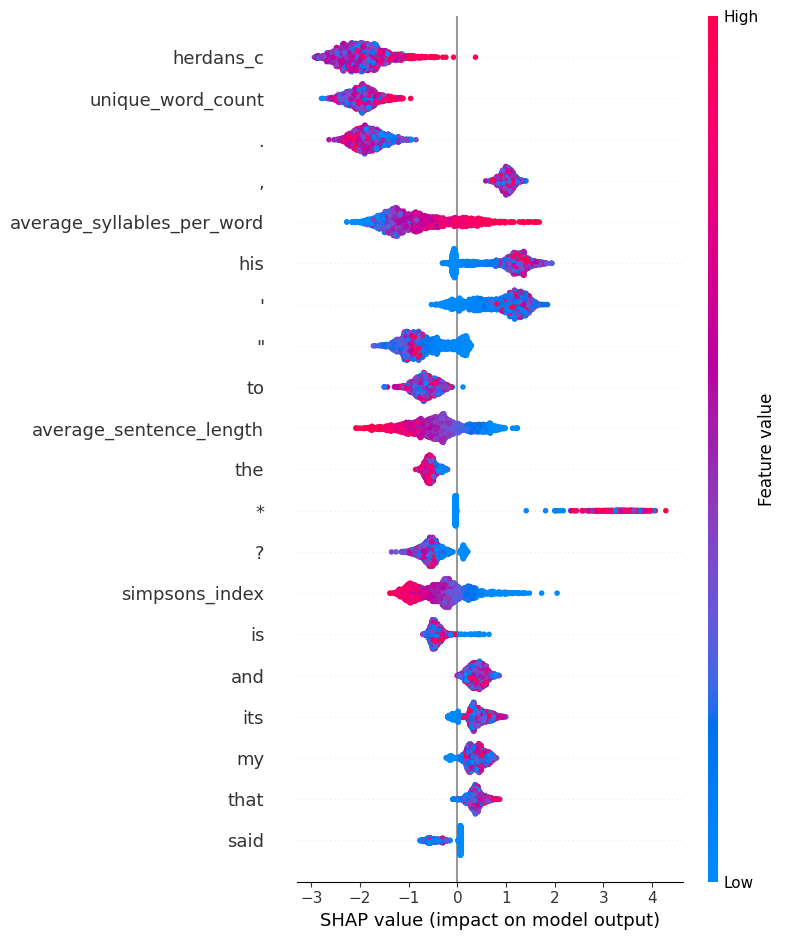

In [9]:
classification = WritingStyleAllFeaturesXGBoostClassification(
    settings=settings, 
    feature_extractor=feature_extractor,
)
results = classification._predict_all_chunks_binary_classification(
    model=xgboost_fit_and_predict_results.all_chunks_binary_classification.model,
    metrics_analysis_results=metrics_analysis_results,
    transform_function=WritingStyleAllFeaturesXGBoostClassification._transform_data_for_binary_collection_classification
)

In [10]:
print(f"Accuracy of XGBoost model: {results.accuracy}")

Accuracy of XGBoost model: 0.26875
